In [1]:
import numpy as np
# import matplotlib
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
def density_percentage(density, boxsize, percentage):
    """
    integrates over a percentage of the boxsize starting from the left
    """
    Vgpt = boxsize/density.shape[0] # length per gridpoint
    
    num_gpt_float = (percentage*boxsize)/Vgpt # number of gpt necessary to present the percentage of the box
    weighted = num_gpt_float%1 # if number of gpt is float, this is the part of the last gpt 
    num_int_gpt = int(num_gpt_float - weighted) # number of gpt that are completely used

    # density that is enclosed in percentage of the box
    return(density[0:num_int_gpt].sum() + density[num_int_gpt+1]*weighted)
    
    

In [3]:
# import 1D densities

# p01

main = '/home/misa/APDFT/prototyping/atomic_energies/results/test_calculations/vasp/dsgdb9nsd_001212/'
boxes = ['box15.0/', 'box20.0/', 'box30.0/', 'box35.0/']

p01 = []

for b in boxes:
    path = main + b + 'pr12.txt'
    p01.append(np.loadtxt(path))

In [4]:
# vgpt
boxsize = np.array([15, 20, 30, 35])

for z in zip(boxsize, p01):
    vgpt = z[0]/z[1].shape[0]
    vgpt_perc = vgpt/z[0]
    print("Boxsize = {} Ang; V_gpt = {}; Vgpt_percentage = {}".format(z[0], vgpt, vgpt_perc))


Boxsize = 15 Ang; V_gpt = 0.029296875; Vgpt_percentage = 0.001953125
Boxsize = 20 Ang; V_gpt = 0.02857142857142857; Vgpt_percentage = 0.0014285714285714286
Boxsize = 30 Ang; V_gpt = 0.029296875; Vgpt_percentage = 0.0009765625
Boxsize = 35 Ang; V_gpt = 0.029166666666666667; Vgpt_percentage = 0.0008333333333333334


In [5]:
# integral 10 idx 280 to 22 idx 725 box 30
bound1 = 12.7
bound2 = 18.8
x = np.linspace(35/2-30/2, 15+30/2, p01[2].shape[0])
idx1 = np.where(x>bound1)[0][0]
idx2 = np.where(x<bound2)[0][-1:][0]
p01[2][idx1:idx2].sum()

39.36472321694902

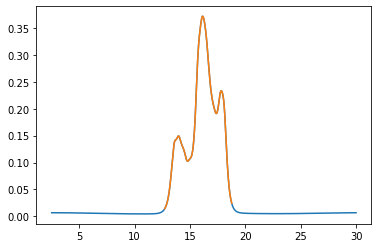

In [6]:
f,a = plt.subplots(1,1)
a.plot(x, p01[2])
a.plot(x[idx1:idx2], p01[2][idx1:idx2])

# Use point at box border or integrate over same percentage at box border

In [7]:
percentage_box15 = 1/p01[0].shape[0]
pp01 = []
first_gpt_p01 = []
for z in zip(p01, boxsize):
    pp01.append(density_percentage(z[0], z[1], percentage_box15))
    vgpt = z[1]/z[0].shape[0]
    first_gpt_p01.append(z[0][0]/vgpt)
pp01 = np.array(pp01)
first_gpt_p01 = np.array(first_gpt_p01)

Text(0, 0.5, '$\\rho$ (Ang$^{-1}$)')

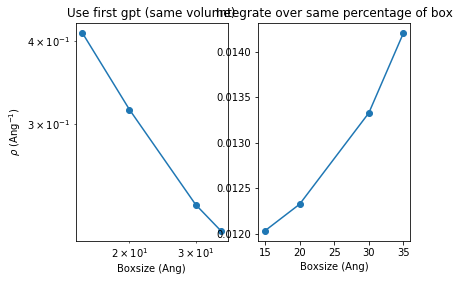

In [8]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Use first gpt (same volume)')
ax[0].plot(boxsize, first_gpt_p01, '-o')
ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[1].set_title('Integrate over same percentage of box')
ax[1].plot(boxsize, pp01, '-o')

ax[0].set_xlabel('Boxsize (Ang)')
ax[1].set_xlabel('Boxsize (Ang)')

ax[0].set_ylabel(r'$\rho$ (Ang$^{-1}$)')
# ax[0].legend()

# Density projections

(0, 30)

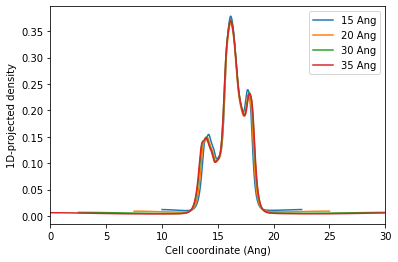

In [9]:
# densities with different boxes
from ase.units import Bohr
fig, ax = plt.subplots(1,1)
labels = ['15 Ang', '20 Ang', '30 Ang', '35 Ang']


for idx, c in enumerate(p01):
    x = np.linspace(35/2-boxsize[idx]/2, 15+boxsize[idx]/2, c.shape[0])
#     pr = c.project((1,0))
    ax.plot(x, c, label = labels[idx])

ax.legend()
ax.set_xlabel('Cell coordinate (Ang)')
ax.set_ylabel('1D-projected density')

ax.set_xlim(0, 30)

In [10]:
#
Bohr

0.5291772105638411

In [11]:
from ase.units import Bohr
ne=40
Ne=44
Zeff=38
Vl = 6**2*2.5/(Bohr**3)
L = np.linspace(6, 100, 1000)/Bohr

In [12]:
q3p = -ne + Zeff - Vl*(ne-Ne)/(L**3-Vl)

Text(0.5, 0, 'Boxlength $L$')

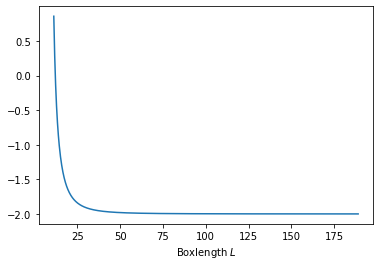

In [13]:
fig, ax = plt.subplots(1,1)
ax.plot(L, q3p)
ax.set_xlabel(r'Boxlength $L$')

# other stuff

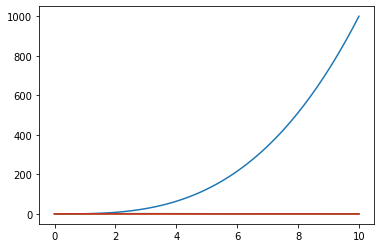

In [14]:
x = np.linspace(0, 10, 100)
plt.plot(x, x**3)
plt.plot(x, np.exp(-x))
plt.plot(x, x**3*np.exp(-x))
plt.plot(x, x*np.exp(-x))

In [15]:
v_normalized = []
for z in zip(boxsize, p01):
    vgpt = z[0]/z[1].shape[0]
    v_normalized.append(z[1][0]/vgpt)
    
v_normalized = np.array(v_normalized)

In [16]:
v_normalized

array([0.41072107, 0.31555411, 0.22743873, 0.20784449])

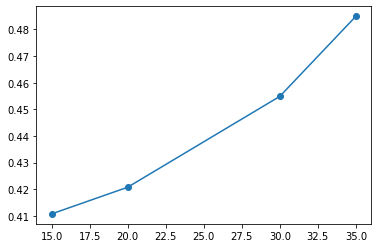

In [17]:
plt.plot(boxsize, v_normalized*boxsize/15, '-o')

one element of array: good because same volume per gpt (in infinite limit the same value)?
in finite volume gives wrong results; integrate over same percentage of box instead (should give the same number of electrons)
or normalize by total volume of the box



In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(boxsize, [0.012-0.01, 0.009-0.007, 0.0066-0.0045, 0.006-0.0038])